In [1]:
%matplotlib Widget

import sampling
import modeling

import importlib
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spec
from tqdm import tqdm

plt.style.use("bmh")

tau = np.pi*2

100%|██████████| 9/9 [00:02<00:00,  4.15it/s]


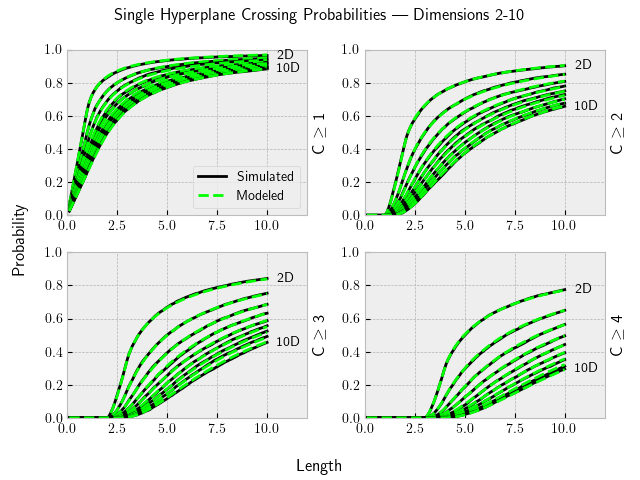

In [24]:
# Probability Given a single set of hyperplanes
importlib.reload(sampling)
importlib.reload(modeling)

samples = 10000
dims = np.arange(2, 11, 1)
lengths = np.linspace(0.1, 10, 101)
hyperplanes = 1
Cs = np.arange(4)+1

plt.rc('text', usetex=True)
fig, axes = plt.subplots(2,2)
axs = axes.reshape(-1)
for c, ax in zip(Cs, axs):
    for dim in tqdm(dims):
        spacing = np.ones(dim)
        sim_probs = sampling.get_sim_prob_ge(samples, dim, lengths, c, hyperplanes, spacing)
        ax.plot(lengths, sim_probs, "k")

        probabilities = modeling.prob_of_crossing_single_set(lengths, dim, c, spacing[0])
        ax.plot(lengths, probabilities, "--", color=(0,1,0))

        ax.set_ylim([-0.2, 1.2])
        ax.set_ylabel(r'C $\ge$ ' + f"{c}")
        ax.yaxis.set_label_position("right")

        if dim == dims[0] or dim == dims[-1]:
            ax.text(lengths[-1]+ 0.5, sim_probs[-1], f"{dim}D", verticalalignment="center", horizontalalignment="left")

    if c == 1:
        ax.legend(["Simulated", "Modeled"])
    ax.set_xlim([0, 12])
    ax.set_ylim([0, 1])
fig.supylabel("Probability")
fig.supxlabel("Length")
fig.suptitle("Single Hyperplane Crossing Probabilities | Dimensions 2-10")
plt.tight_layout()

100%|██████████| 4/4 [00:29<00:00,  7.28s/it]


Text(0.5, 1.0, 'Multi-hyperplane Crossing Probability')

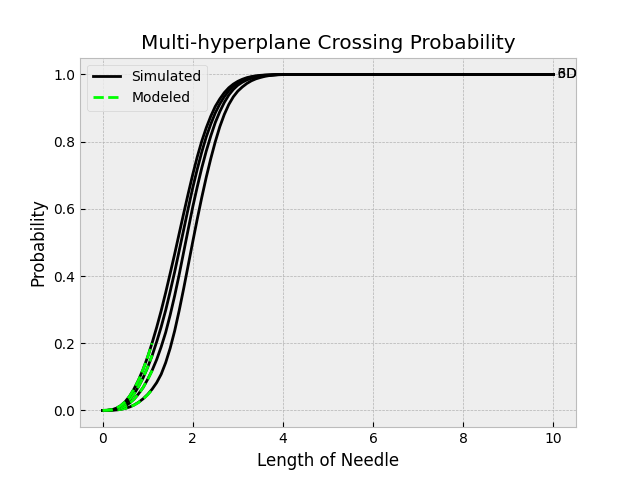

In [45]:
# Probability Given multiple sets of hyperplanes, greater than or equal
importlib.reload(sampling)
importlib.reload(modeling)

samples = 100000
dims = np.arange(2, 7, 1)
lengths = np.linspace(0, 10, 101)
c = 2

fig, ax = plt.subplots()
for idx, dim in enumerate(tqdm(dims)):
    spacing = (np.arange(dim)+11)/10
    hyperplanes = max(1, dim)

    sim_probs = sampling.get_sim_prob_ge(samples, dim, lengths, c, hyperplanes, spacing)
    ax.plot(lengths, sim_probs, "k")

    r_s = lengths[lengths<=min(spacing)]
    modeled_prob = modeling.prob_of_crossing_small_r_ge(r_s, dim, c, hyperplanes, spacing)
    ax.plot(r_s, modeled_prob, "--", color=(0, 1, 0))

    if idx==0:
        ax.text(lengths[-1], sim_probs[-1], f" {dim}D", verticalalignment="center")
        ax.legend(["Simulated", "Modeled"])
        
ax.text(lengths[-1], sim_probs[-1], f" {dim}D", verticalalignment="center")
ax.set_xlabel("Length of Needle")
ax.set_ylabel("Probability")
ax.set_title("Multi-hyperplane Crossing Probability")


100%|██████████| 8/8 [00:06<00:00,  1.28it/s]


Text(0.5, 1.0, 'Multi-hyperplane Crossing Probability')

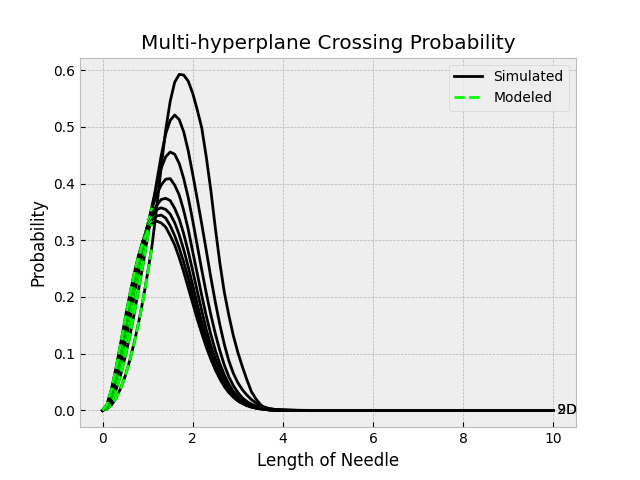

In [48]:
# Probability Given multiple sets of hyperplanes, exact
importlib.reload(sampling)
importlib.reload(modeling)

samples = 100000
dims = np.arange(2, 10, 1)
lengths = np.linspace(0, 10, 101)
c = 2

fig, ax = plt.subplots()
for idx, dim in enumerate(tqdm(dims)):
    spacing = (np.arange(dim)+11)/10
    hyperplanes = max(1, dim)

    sim_probs = sampling.get_sim_prob_e(samples, dim, lengths, c, hyperplanes, spacing)
    ax.plot(lengths, sim_probs, "k")

    r_s = lengths[lengths<=min(spacing)]
    modeled_prob = modeling.prob_of_crossing_small_r(r_s, dim, c, hyperplanes, spacing)
    ax.plot(r_s, modeled_prob, "--", color=(0, 1, 0))

    if idx==0:
        ax.text(lengths[-1], sim_probs[-1], f" {dim}D", verticalalignment="center")
        ax.legend(["Simulated", "Modeled"])
        
ax.text(lengths[-1], sim_probs[-1], f" {dim}D", verticalalignment="center")
ax.set_xlabel("Length of Needle")
ax.set_ylabel("Probability")
ax.set_title("Multi-hyperplane Crossing Probability")

In [113]:
importlib.reload(sampling)
# multi-spacing debug
# np.random.seed(2)
samples = 100000
dim = 4
hyperplanes = 2
N = hyperplanes
spacing = np.arange(dim)+2
# spacing = np.ones(dim)
length = 2.5

xs = np.random.random((samples, dim))*spacing[None, :]
hypersphere = sampling.get_samples_gaussian(samples, dim)
ys = xs + length * hypersphere

# prob that any hyperplane is crossed once
intersections = 0
for y in ys:
    if any(y[:hyperplanes]>spacing[:hyperplanes]) or any(y[:hyperplanes]<0):
        intersections += 1
probability = intersections / samples
print(probability)

# prob that hyperplanes in every direction are crossed at least once
intersections = 0
for y in ys:
    if all((y[:hyperplanes]>spacing[:hyperplanes]) + (y[:hyperplanes]<0)):
        intersections += 1
probability = intersections / samples
print(probability)

0.70965
0.16287
0.25676724523353117
0.1641064302103099


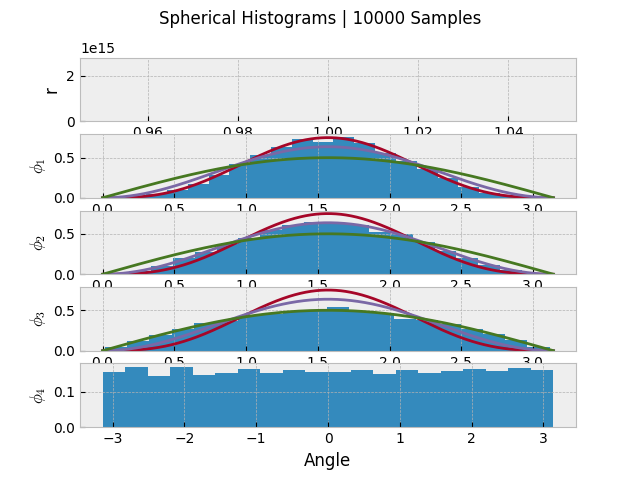

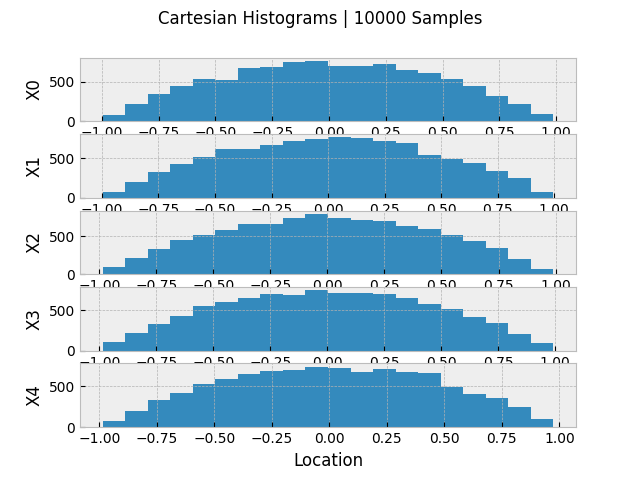

In [35]:
importlib.reload(sampling)
hypersphere = sampling.get_samples_gaussian(n_samples=10000, n_dims=5)
spherical_coords = sampling.cartesian_to_spherical(hypersphere)
sampling.plot_spherical_histograms(spherical_coords)
cartesian_coords = sampling.spherical_to_cartesian(spherical_coords)
sampling.plot_cartesian_histograms(cartesian_coords)